# **<u>Project Title : Hotel Bookings Data Analysis**

---



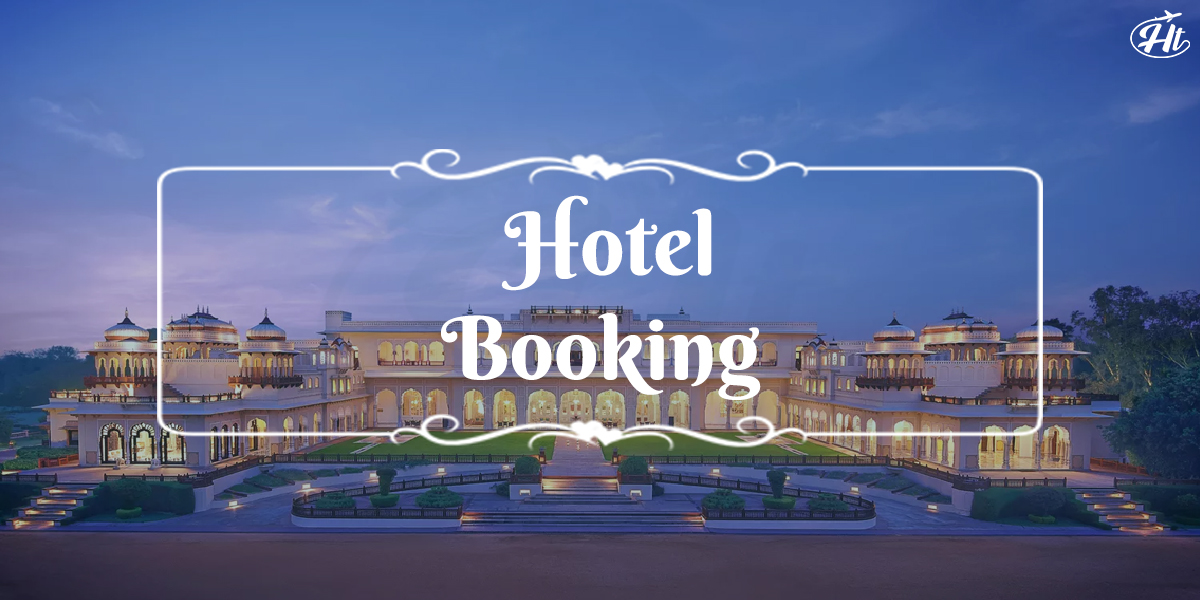

### **Reason behind the project**

Every year, more than 140 million bookings were made on the internet and many hotel bookings were booked through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc. Booking cancellations have a substantial impact on demand management decisions in the hospitality industry.

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.



This project contains the real world data record of hotel bookings of a city and a resort hotel containing details like bookings, cancellations, guest details etc. from 2015 to 2017. Main aim of the project is to understand and visualize dataset from hotel and customer point of view 

* reasons for booking cancellations across various parameters
* best time to book hotel
* peak season

## **Importing the Dependencies**

We will start our project with importing the main libraries that we will use for this project.

In [49]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## **Data Collection**

In [50]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv("/content/drive/MyDrive/projects/Hotel booking analysis/Hotel Bookings.csv")

In [51]:
# printing 10 rows of the dataset
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


# **Data Description**

### **Attribute Information:**

**Hotel**:Hotel (H1 = Resort Hotel or H2 = City Hotel)

**is_canceled**:Value indicating if the booking was canceled (1) or not (0)

**lead_time**:Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year**:Year of arrival date

**arrival_date_month**:Month of arrival date

**arrival_date_week_number**:Week number of year for arrival date

**rrival_date_day_of_month**:Day of arrival date

**stays_in_weekend_nights**:Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights**:Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults**:Number of adults

**children**:Number of children

**babies**:Number of babies

**meal**:
         * BB – Bed & Breakfast
         * HB – only two meals including breakfast meal
         * FB – breakfast, lunch, and dinner text


**country**:Country from they belong

**market_segment**:*TA: Travel agents*TO: Tour operators

**is_repeated_guest**:is guest repeated

**previous_cancellations**:Have they canceled previous bookings

**previous_bookings_not_canceled**:

**reserved_room_type**:Type of room they reserved 

**assigned_room_type**:Type of room they assigned

**booking_changes**:booking changed or not

**deposit_type**:deposit type they preferred 

**agent**:was ther any agent between for hottel recomndation         

**company**:

**days_in_waiting_list**:   

**customer_type**:   

**adr**:Average daily rate  

**required_car_parking_spaces**:Spaces required for car parking

**total_of_special_requests**:total number of special requests

**reservation_status**:Status of reservation is it canceled,waiting,confirmed   

**reservation_status_date**:date of reservation

## **More about data**

In [52]:
#identifying shape of the dataset
df.shape

(119390, 32)

**ohhh! We checked shape and its 119390 rows dataset**

In [53]:
#understanding some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [54]:
# statistical measures about the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Preprocessing of dataset**


* In this section, we will find the missing values in the dataset.

* we will  work on the missing values


Now lets check how many values are missing from our dataset.

In [55]:
# Checking Null Values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**We can see that we have 4 columns [ children, country , agent , company ] with missing values.** 


---



Lets drop the null values of some columns which are very less as compare to the dataset

In [56]:
#droping null values of column country, agent , children
df.dropna(subset=['country',"agent","children"], inplace=True)

**The columns country ,agent ,children have a less number  of missing values. We will remove the full row of missing values.**

In [57]:
# rechecking Null Values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

**The columns “company” have a high number of missing values., we will drop it further.**

In [58]:
#identifying shape of the dataset
df.shape

(102894, 32)

**Now you can see that we have 102894 rows here**

In [59]:
#droping column company from the dataset 
df.drop(columns=["company"],inplace=True)

In [60]:
# printing 5 rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


Perfect! now we have our dataset ready.


Lets give a closer look on Exploratory Analysis.

## **Exploratory Analysis**

* In this section, we will explore the data to get insights about it.

* we will see the statistical measures of every variable .

* relationships between variables




### **Feature Hotel**

Lets see the proportion of reservations between hotel types.

In [61]:
# counting the hotel variable from data set
df['hotel'].value_counts()

City Hotel      71181
Resort Hotel    31713
Name: hotel, dtype: int64

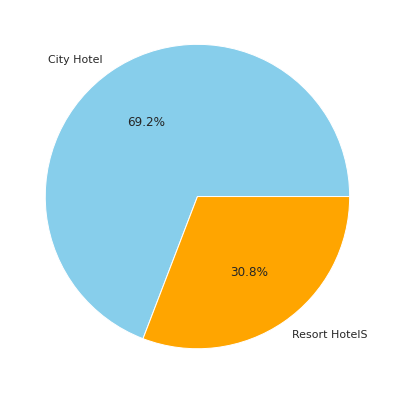

In [62]:
# Creating dataset
hotels = ['City Hotel','Resort HotelS']
data=df['hotel'].value_counts() 
colors = ['skyblue', 'orange']
highlight =(0,0)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = hotels,autopct='%1.1f%%', explode=highlight,colors=colors)
 # show plot
plt.show()

**approx. 69.2 % People are booking city hotels which is more than Resort hotels.**


### **Feature lead_time and arrival_date_year**

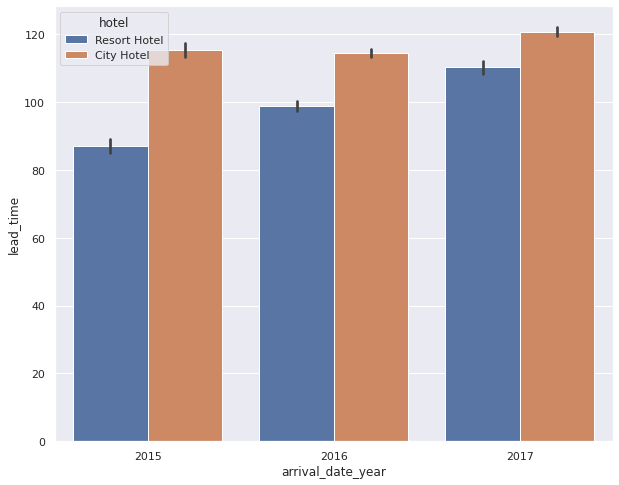

In [63]:
#plotting bar plot for understanding count of lead_time for arrival_date_year
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='arrival_date_year',y='lead_time',hue='hotel',ax=ax)

**For two years 2015, 2016 ,you will see bookings with a lead time around 100 days for resort hotel and approx 110 days for city hotel, and for year 2017  lead time was more than 100 days for city hotel and resort hotel**  .

### **Feature is_canceled**

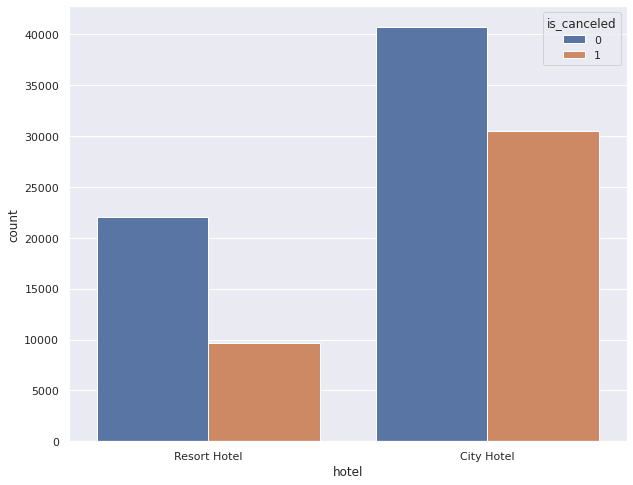

In [64]:
# checking the count distribution of hotel Variable and relation with is_canceled
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(x ='hotel', hue='is_canceled', data = df,ax=ax)

**According to the bar graph, around 40000 of bookings from city hotel and around 23000 bookings from Resort hotel were not canceled**

### **Feature Year**

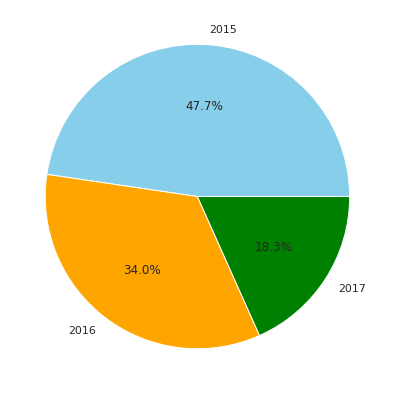

In [65]:
# Creating dataset
years = ['2015','2016','2017']
data=df['arrival_date_year'].value_counts() 
colors = ['skyblue', 'orange','green']
highlight =(0,0)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = years,autopct='%1.1f%%',colors=colors)
 # show plot
plt.show()

**according pie chart, year 2015 was the busiest year with approx 47.7% of bookings** 


---



### **Feature arrival date month**

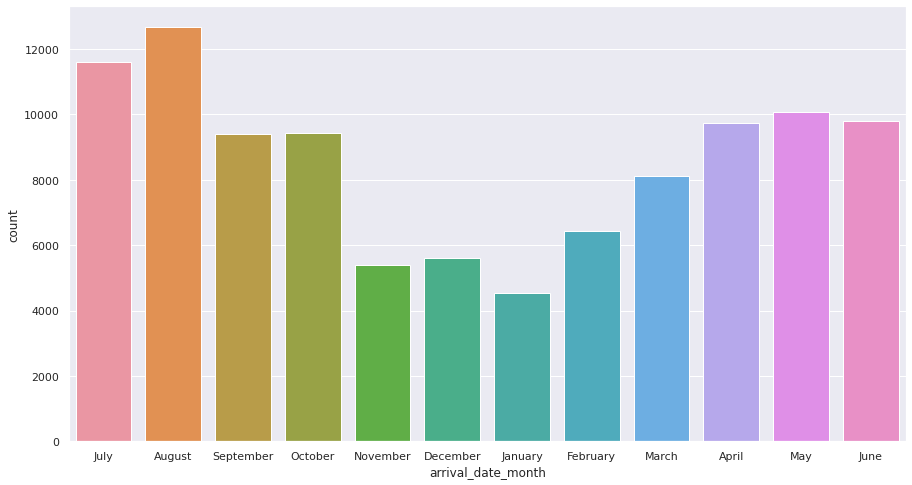

In [66]:
# checking the count distribution of arrival_date_month Variable
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(x ='arrival_date_month', data = df,ax=ax)

**AS you can see traffic in the january and November is less as compare to the other months**


---



### **Relation between is_canceled and Hotel**

In [67]:
#calculating percentage of is_canceled for hotel
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.648845
             Resort Hotel    0.351155
1            City Hotel      0.758871
             Resort Hotel    0.241129
Name: hotel, dtype: float64

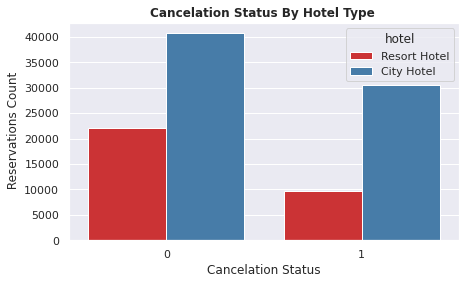

In [68]:
# plotting the count plot of hotel for is_canceled variable
plt.figure(figsize = (7,4))
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

* **For the Resort Hotel, total of 25.14% Bookings were cancelled**
* **For the City Hotel, total of 74.85% Bookings were cancelled**

### **Feature adult**

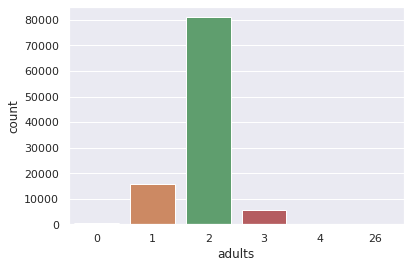

In [69]:
# checking the count distribution of adults Variable
sns.countplot(x ='adults', data = df)

**accordingly Couple (or 2 adults) is the most popular accommodation type.**


---



### **Feature Meal**

Type of meal booked. Categories are presented in standard hospitality meal packages:

Undefined/SC — no meal package;

BB — Bed & Breakfast;

HB — Half board (breakfast and one other meal — usually dinner);

FB — Full board (breakfast, lunch and dinner)

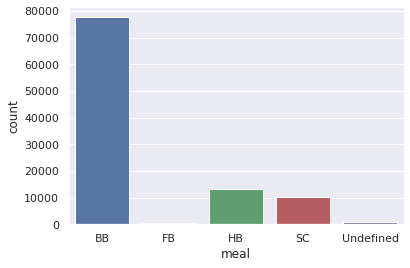

In [70]:
# checking the count distribution of meal Variable
sns.countplot(x ='meal', data = df)

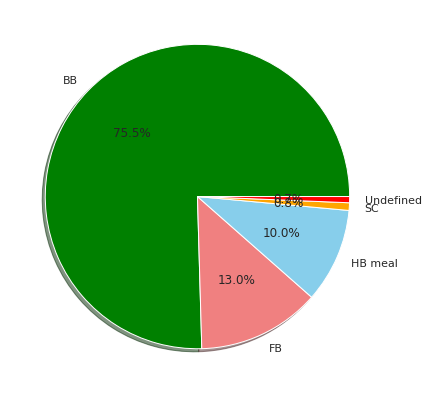

In [71]:
# Creating dataset
meals = ['BB','FB','HB meal','SC','Undefined']
data=df['meal'].value_counts() 
colors = ['green','lightcoral','skyblue','orange','red']
highlight =(0,0,0,0,0)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = meals,autopct='%1.1f%%',colors=colors,shadow=True)
 # show plot
plt.show()

**The Bed & Breakfast option is the most popular, with a frequency of 75.5%.**


---



### **Feature country**

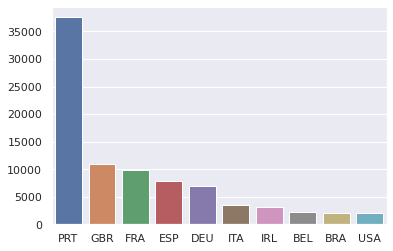

In [72]:
# checking the count distribution of country Variable
sns.barplot(x= list(df.country.value_counts().head(10).index),y= list(df.country.value_counts().head (10)), data = df)

In [73]:
import plotly.express as px
temp = df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,
                          locations=temp['country'],
                          color=np.log(temp['count']), 
                          hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title="Home country of guests")
guest_map.show()



* **As we can see, Portugal tops the list with approx. 37k of the cases, followed by Great Britain with approx. 12k and France with approx 10k**

*  **There are 10 countries in our bar that can be considered as the most common country of origin** 


---



### **Feature market segment**

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

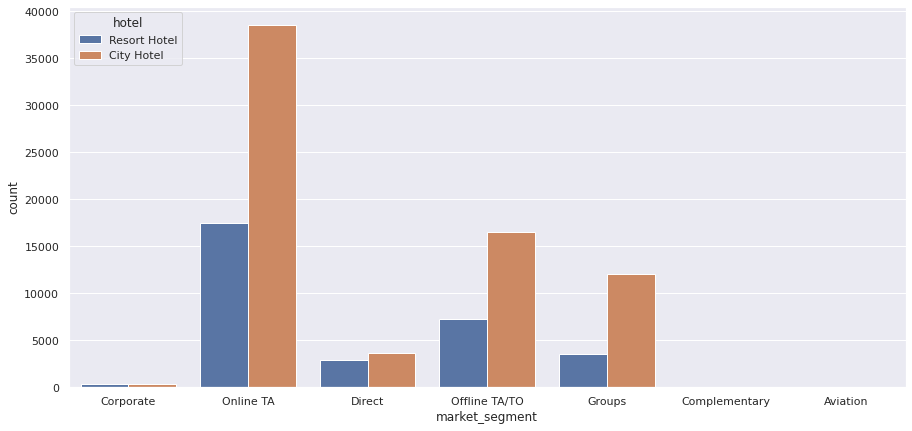

In [74]:
#plotting the bar plot of market_segment Variable
plt.figure(figsize=(15,7))
sns.countplot(x ='market_segment',hue="hotel", data = df)

**Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.**






---



### **Feature distribution channel**

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

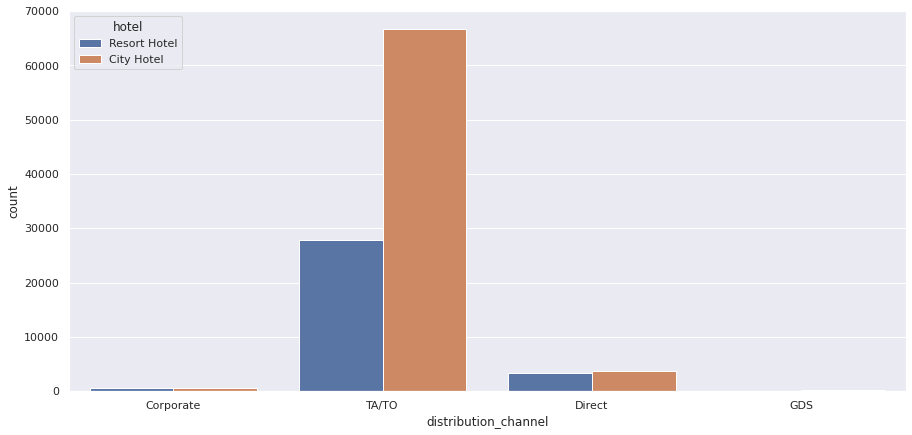

In [75]:
# checking the count distribution of distribution_channel over hotels 
plt.figure(figsize=(15,7))
sns.countplot(x ='distribution_channel',hue="hotel", data = df)

**Bookings through Travel Agents,Tour Operators is preferred by most of the people**

*  **approx. 70000 city hotels are book by Travel Agents & Tour Operators**
*  **approx. 30000 resort hotels are book by Travel Agents & Tour Operators**



---



### **Feature reserved_room_type**

Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

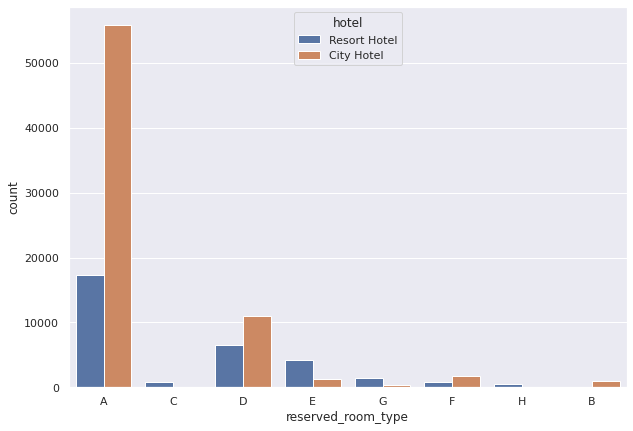

In [76]:
# checking the count distribution of reserved_room_type Variable
plt.figure(figsize=(10,7))
sns.countplot(x ='reserved_room_type',hue="hotel", data = df)

### **Feature Deposit Type**

Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

* No Deposit — no deposit was made;

* Non Refund — a deposit was made in the value of the total stay cost;

* Refundable — a deposit was made with a value under the total cost of stay.

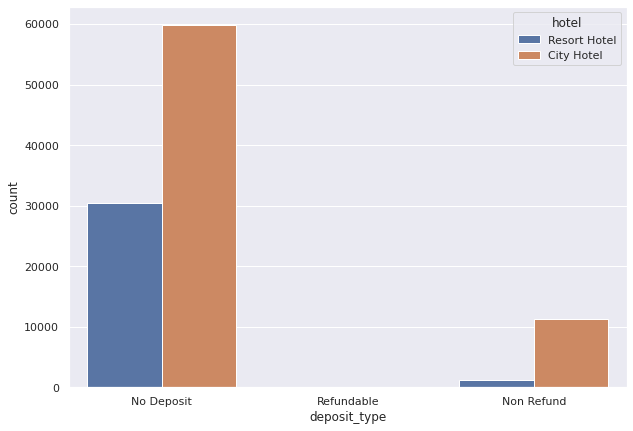

In [77]:
# checking the count distribution of deposit_type Variable
plt.figure(figsize=(10,7))
sns.countplot(x ='deposit_type',hue="hotel", data = df)

**people preferred No deposite type most for both resort and city hotels**

### **Relation between Deposit Type on is Canceled**

In [78]:
#calculating percentage of is_canceled for deposit_type
df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)

deposit_type  is_canceled
No Deposit    0              0.693669
              1              0.306331
Non Refund    1              0.995688
              0              0.004312
Refundable    0              0.500000
              1              0.500000
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

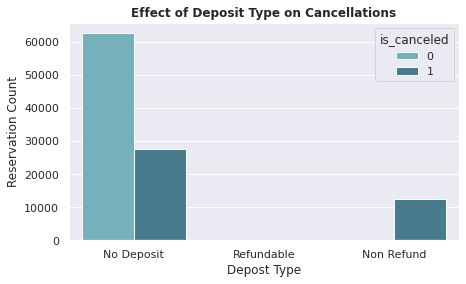

In [79]:
# plotting the count plot of deposit_type for is_canceled variable
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')

* **Around 30% bookings were cancelled by guests with no deposit, followed by 50% bookings were cancelled which are with Refundable policy**
* **So its obvious that guests who do not pay any deposit while booking are likely to cancel more reservations**

### **Feature Customer Type**
Type of booking, assuming one of four categories:

Contract — when the booking has an allotment or other type of contract associated to it;

Group — when the booking is associated to a group;

Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;

Transient-party — when the booking is transient, but is associated to at least other transient booking

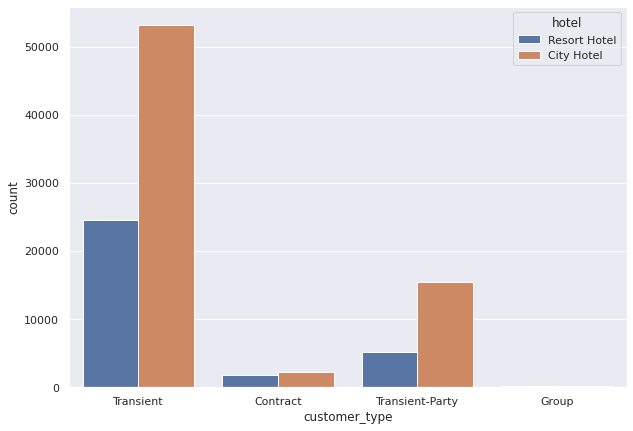

In [80]:
# checking the count distribution of customer_type Variable
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x ='customer_type',hue="hotel", data = df)

**Trasients are the most common customer type, they represent count more than 50000 for city hotel and approx. 24000 for resort hotel.**


---



### **Relation between booking_changes and is_canceled**

In [81]:
#calculating percentage of is_canceled for booking_changes
df.groupby('booking_changes')['is_canceled'].value_counts(normalize = True)[:6]

booking_changes  is_canceled
0                0              0.575622
                 1              0.424378
1                0              0.842715
                 1              0.157285
2                0              0.762924
                 1              0.237076
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

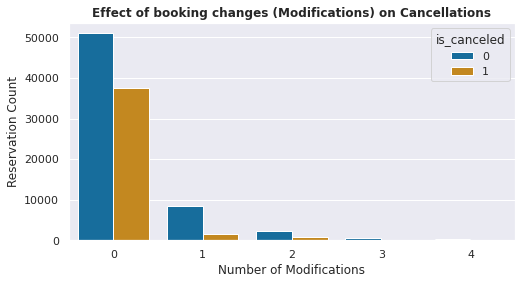

In [82]:
# plotting the count plot of booking_changes for is_canceled variable
plt.figure(figsize=(8,4))
sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = df,palette= 'colorblind')
plt.title ('Effect of booking changes (Modifications) on Cancellations',weight = 'bold')
plt.xlabel("Number of Modifications")
plt.ylabel('Reservation Count')

* **Around 42% of bookings were cancelled by the guests when no modifications done**
* **Around 15% of bookings were cancelled by the guests when one modificationsification was done**

### **Relation between required car parking spaces and hotel type**

Number of car parking spaces required by the customer.

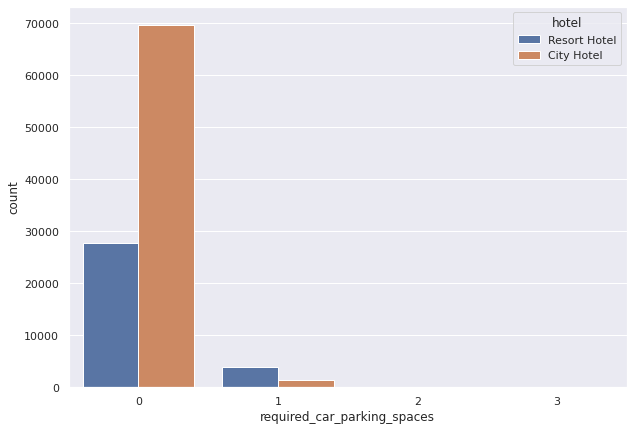

In [83]:
# checking the count distribution of required_car_parking_spaces Variable
plt.figure(figsize=(10,7))
sns.countplot(x ='required_car_parking_spaces',hue="hotel", data = df)

* **From the above bar graph You can say that in the city hotels around 70000 people not required car parking spaces**
* **and around 27000 people not required car parking spaces for resort hotel** 

### **Relation between Arrival Month and ADR for is canceled**

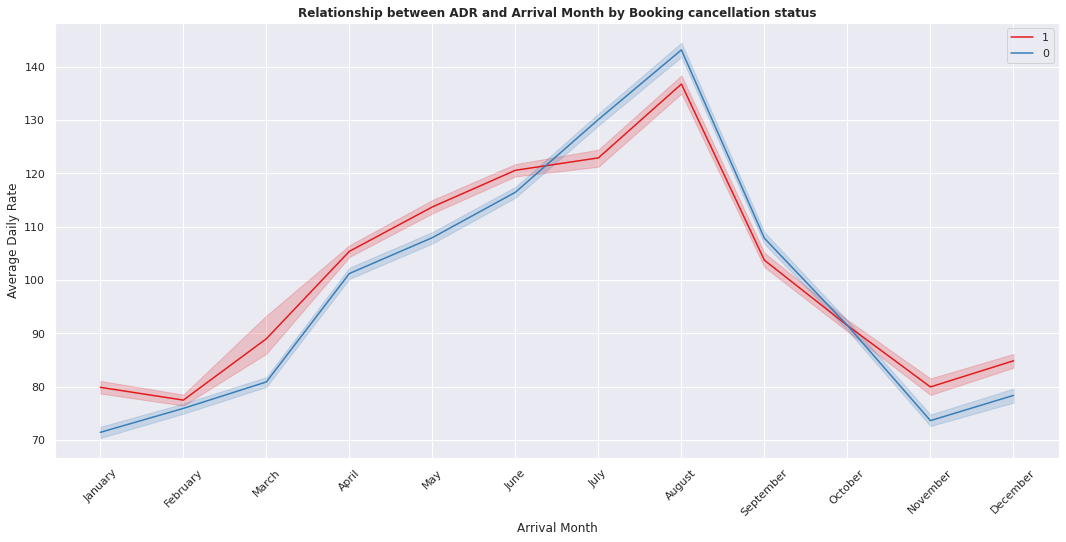

In [84]:
#plotting line plot for understanding relation between  adr and arrival_date_month for is_canceled
plt.figure(figsize=(18,8))
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",hue_order= [1,0],data=df,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()

* **The above line chart depicts arrival month "August" is the most occupied (Busiest) month of bookings.**
* **The highest Arrival Daily Rate (ADR) has been occurred in same August month**.
* **Due to Highest ADR in August may be it could be one of the reasons for more canceled bookings in August.**

### **Relation between prices and month**

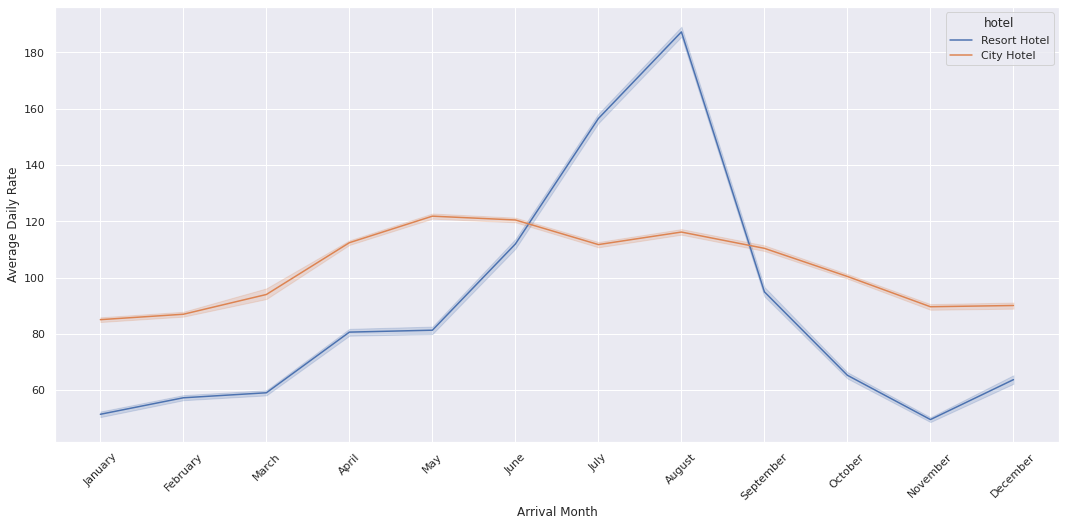

In [85]:
#plotting line plot for understanding relation between  adr and arrival_date_month for hotels
fig,ax=plt.subplots(figsize=(18,8))
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(data=df,x='arrival_date_month',y='adr',hue='hotel',ax=ax)
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.show()

* **For resort hotels, the average daily rate is more expensive during august, july and september.**


* **For city hotels, the average daily rate is more expensive during august, july, june and may.**


---



### **Relation between ADR and Arrival date year**

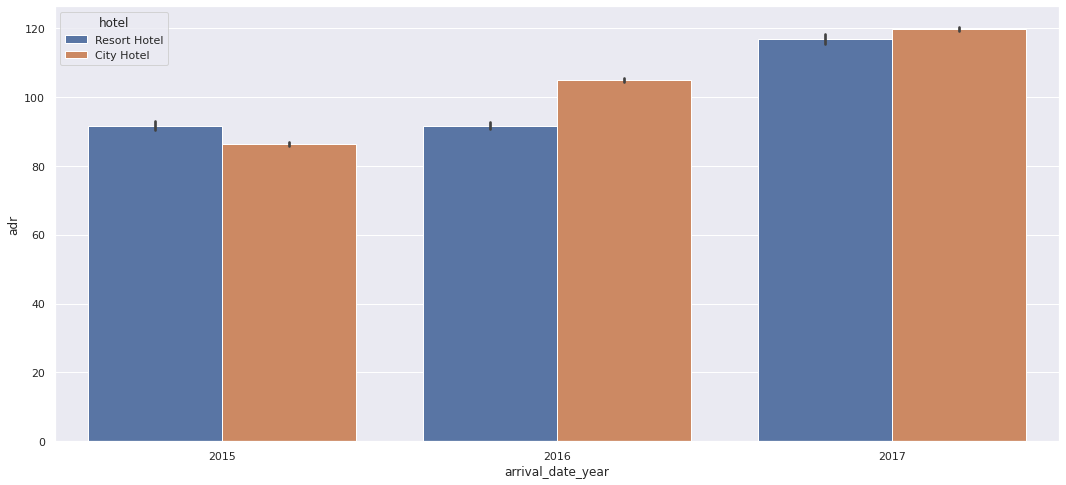

In [86]:
#plotting line plot for understanding relation between ADR and arrival_date_year for hotels
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='arrival_date_year',y='adr',hue='hotel',ax=ax)

*  **The year of highest occupation is 2017 with more than 100 ADR**


*  **The year of lest occupation is 2015 with more approx 90 ADR**.


---



### **Relation between ADR amd arrival date month**

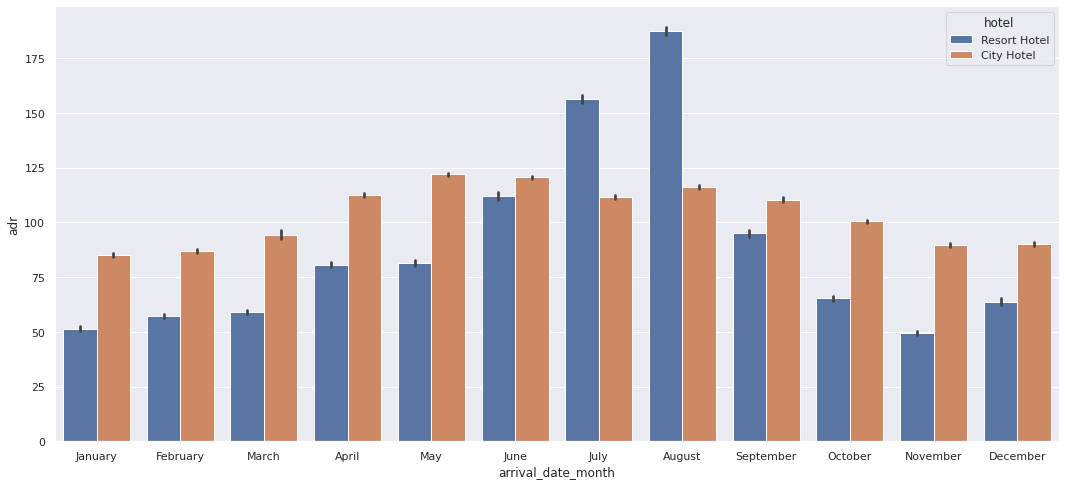

In [87]:
#plotting line plot for understanding relation between adr and arrival_date_year for hotels
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='arrival_date_month',y='adr',hue='hotel',ax=ax)

**For resort hotels**

* **the average daily rate is more expensive during aug and july.**

* **the average daily rate is less expensive during nov and jan**

**For city hotels**

* **the average daily rate is more expensive during june and may**.

* **the average daily rate is less expensive during jan and feb.**


---



### **Feature stays in week nights**

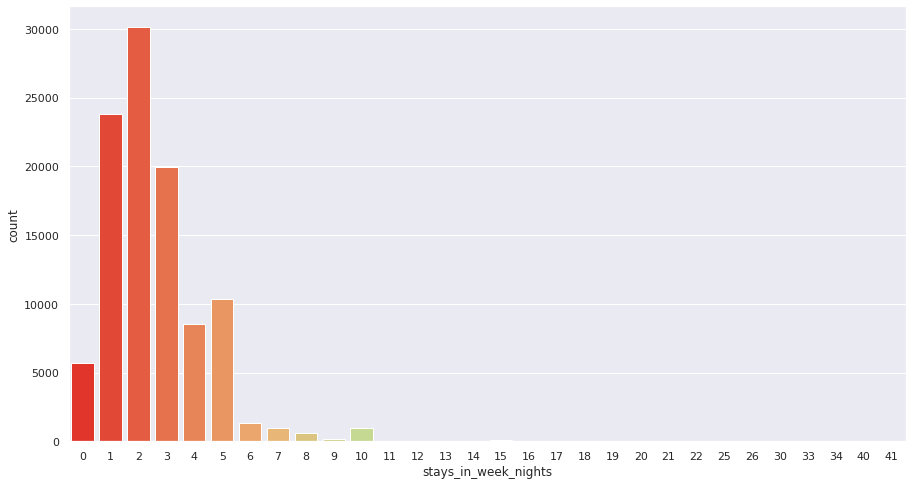

In [88]:
#plotting count plot for stays_in_week_nights variable
plt.figure(figsize=(15, 8))
sns.countplot(x='stays_in_week_nights', data=df, palette='rainbow_r')

**Here ,you will see that people prefered 2 nights for most of the time in the weeks**

### **Heatmap**

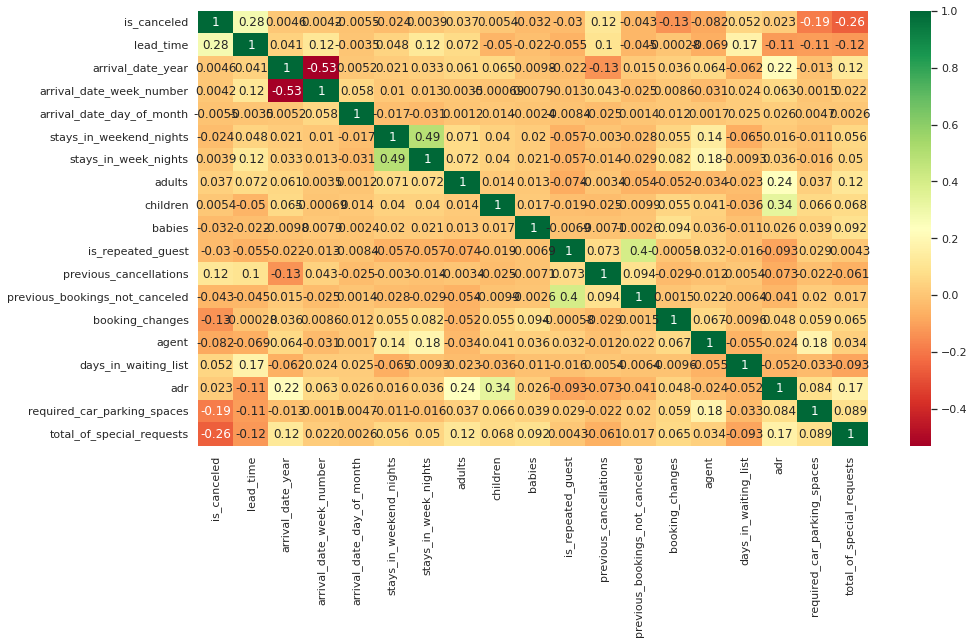

In [89]:
#Lets see the correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

* **We can see our features,stays in week nights and stays in weekeend nights have a correlation as compare to the most of the other columns.**

* **arrival date week number is negatively co-related to the arrival date year**

## **Conclusion**

**From our EDA, we have observed that the top most important patterns in the data set which will helps in Hotel booking buisness**


###**Reasons for booking cancellations across various parameters**

* **Almost 35% of bookings were canceled and thats great number to concern**.

* **Approx 30% bookings were cancelled by guests with no deposit type & 50% bookings were cancelled by guests with Refundable polic**

*  **the guests with no modifications cancelled bookings Around 42%**  

* **AS highest ADR in August may be it could be one of the reasons for more canceled bookings in August**

### **Strategies to Counter High Cancellations at the Hotel**

* **Encourage Direct bookings by offering special discounts**

* **Monitor where the cancellations are coming from such as High ADR , Deposite type, etc.**

* **Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies**


### **Best time to book hotel**

* **Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly**

* **Most bookings were made from July to August. And the least bookings were made at the start and end of the year**

* **More than 60% of the population booked the City hotel.**

* **The majority of guests come from western europe countries.Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.**.

* **More than 47% bookings were made in 2015, 34% to the 2016 year. But the bookings decreased by almost 16% next year** .
.
 
